In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from datetime import datetime
import numpy as np
import seaborn as sns

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [2]:
# CSVs from Resources Folder
file_one = "Resources\Data1.csv"
file_two = "Resources\Data2.csv"

In [3]:
# Reading Data from CSV files
file_one_df = pd.read_csv(file_one, encoding="ISO-8859-1")
file_two_df = pd.read_csv(file_two, encoding="ISO-8859-1")

In [4]:
# Combine and create dataframe with 'date' attribute
file_one_df["DATE"]=file_two_df["DATE"]
file_one_df.head()

,Temperature,Revenue,DATE
0,24.566884,534.799028,01/01/1972
1,26.005191,625.190122,01/02/1972
2,27.790554,660.632289,01/03/1972
3,20.595335,487.706960,01/04/1972
4,11.503498,316.240194,01/05/1972


In [5]:
# Combine and create dataframe with 'value' attribute
file_one_df["value"]=file_two_df["value"]
file_one_df.head()

,Temperature,Revenue,DATE,value
0,24.566884,534.799028,01/01/1972,59.9622
1,26.005191,625.190122,01/02/1972,67.0605
2,27.790554,660.632289,01/03/1972,74.2350
3,20.595335,487.706960,01/04/1972,78.1120
4,11.503498,316.240194,01/05/1972,84.7636


In [6]:
# Create one combined dataframe
data=file_one_df

In [7]:
#Renaming Columns
final_data=data.rename(columns={"DATE": "Date", "value": "Consumption"})

In [8]:
# Final dataframe
final_data.head()

,Temperature,Revenue,Date,Consumption
0,24.566884,534.799028,01/01/1972,59.9622
1,26.005191,625.190122,01/02/1972,67.0605
2,27.790554,660.632289,01/03/1972,74.2350
3,20.595335,487.706960,01/04/1972,78.1120
4,11.503498,316.240194,01/05/1972,84.7636


In [9]:
min_rev=data['Revenue'].min()
min_rev

10.0

In [10]:
max_rev=data['Revenue'].max()
max_rev

1000.0

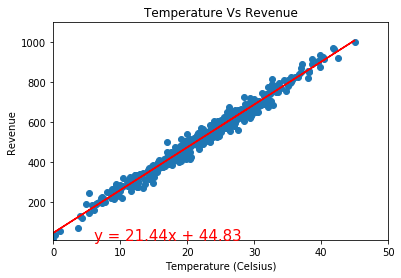

In [11]:
# Adding the linear regression equation and plotting Temperature and Revenue data
x_axis=final_data.Temperature
y_axis=final_data.Revenue
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Temperature (Celsius)")
plt.ylabel("Revenue")
plt.title("Temperature Vs Revenue")
plt.xlim(0,50)
plt.ylim(10,1100)
plt.show()

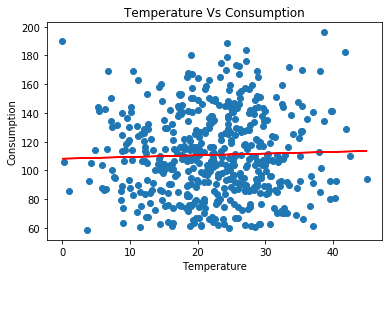

In [12]:
# Adding the linear regression equation and plotting Temperature and Consumption data
x_axis=final_data.Temperature
y_axis=final_data.Consumption
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Temperature")
plt.ylabel("Consumption")
plt.title("Temperature Vs Consumption")
plt.show()

In [13]:
# Adding new 'month column' to the final dataframe
final_data['Month']=final_data['Date'].str.split('/').str[1].astype(int)
final_data.head()

,Temperature,Revenue,Date,Consumption,Month
0,24.566884,534.799028,01/01/1972,59.9622,1
1,26.005191,625.190122,01/02/1972,67.0605,2
2,27.790554,660.632289,01/03/1972,74.2350,3
3,20.595335,487.706960,01/04/1972,78.1120,4
4,11.503498,316.240194,01/05/1972,84.7636,5


In [14]:
# Final dataframe with 'month' column
final_data.head()

,Temperature,Revenue,Date,Consumption,Month
0,24.566884,534.799028,01/01/1972,59.9622,1
1,26.005191,625.190122,01/02/1972,67.0605,2
2,27.790554,660.632289,01/03/1972,74.2350,3
3,20.595335,487.706960,01/04/1972,78.1120,4
4,11.503498,316.240194,01/05/1972,84.7636,5


In [15]:
# Temperature statistics
final_data['Temperature'].describe()

count    500.000000
mean      22.232225
std        8.096388
min        0.000000
25%       17.122258
50%       22.392791
75%       27.740674
max       45.000000
Name: Temperature, dtype: float64

In [16]:
# Consumption statistics
final_data['Consumption'].describe()

count    500.000000
mean     110.824557
std       29.221577
min       58.659800
25%       88.511975
50%      107.865950
75%      131.557275
max      196.173700
Name: Consumption, dtype: float64

In [17]:
# Revenue statistics
final_data['Revenue'].describe()

count     500.000000
mean      521.570777
std       175.404751
min        10.000000
25%       405.558681
50%       529.368565
75%       642.257922
max      1000.000000
Name: Revenue, dtype: float64

([<matplotlib.axis.XTick at 0x20b3ab96ec8>,
 <a list of 13 Text xticklabel objects>)

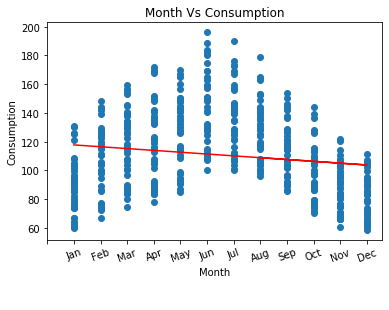

In [18]:
# Adding the linear regression equation and plotting Month and Consumption data
x_axis=final_data.Month
y_axis=final_data.Consumption
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Month")
plt.ylabel("Consumption")
plt.title("Month Vs Consumption")
plt.xticks(np.arange(13),("","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"), rotation=20)


Random Forest Regression
------------------------------------------

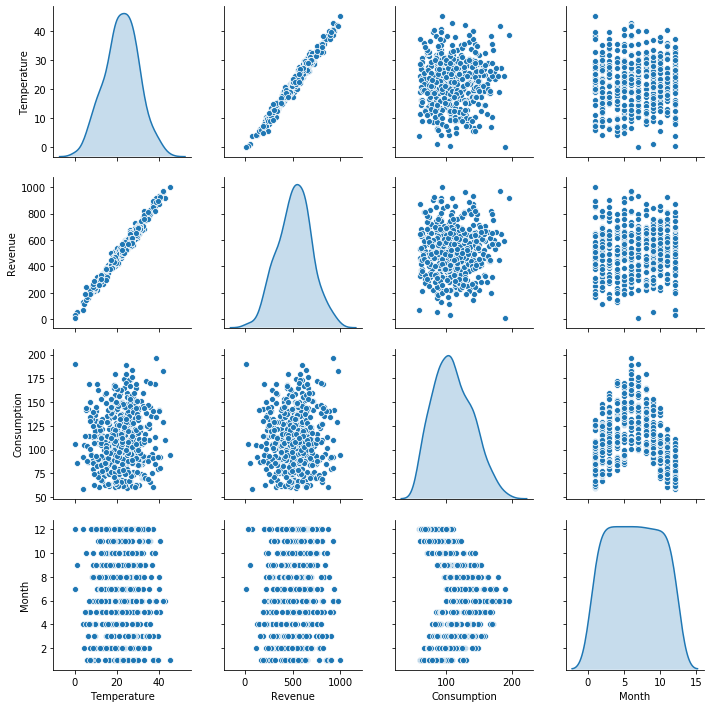

In [19]:
# Data preview
sns.pairplot(final_data[["Temperature", "Revenue", "Consumption", "Month"]], diag_kind="kde")

In [20]:
# Assigning X and y values
X = final_data['Temperature'].values
y = final_data['Revenue'].values

In [21]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50)

In [22]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 42)
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [23]:
# Predicting the Results
y_prediction_results = regressor.predict(X_test.reshape(-1,1))
y_prediction_results

array([237.20989903, 621.98818136, 562.18454933, 649.58875054,
       569.92754216, 465.68390777, 505.9602321 , 703.80966221,
       281.77084774, 505.9602321 , 652.34627625, 330.7844848 ,
       150.13386579, 710.97608054, 459.74313347, 313.53392605,
       600.62073335, 734.74305236, 238.71258806, 496.5597997 ,
       366.3036748 , 149.87790484, 215.24962623, 612.61201437,
       732.08350422, 572.12935449, 301.99441044, 693.05237702,
       646.50661693, 538.49255118, 539.64416869, 848.35588405,
       695.75650958, 603.98338174, 616.84552743, 457.8331573 ,
       410.77345338, 893.11469998, 559.10407828, 799.18899806,
       859.67656026, 156.16305568, 380.41530687, 749.19916561,
       277.93397243, 494.22577286, 458.22198436, 639.8645745 ,
       652.09616444, 491.16201857, 727.94556525, 263.85132206,
       334.7325945 , 371.54313597, 594.40080882, 466.87250934,
       508.29390362, 299.50565405, 670.5951955 , 651.59523953,
       651.77694208, 536.90690905, 635.3453697 , 477.52

In [24]:
# Comparing the Real Values with Predicted Values
Comparison_df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_prediction_results.reshape(-1)})
Comparison_df


,Real Values,Predicted Values
0,272.857021,237.209899
1,623.248701,621.988181
2,555.245217,562.184549
3,719.471701,649.588751
4,531.742485,569.927542
...,...,...
245,276.373374,237.209899
246,506.493748,542.202607
247,283.834327,240.089010
248,563.250987,605.008145


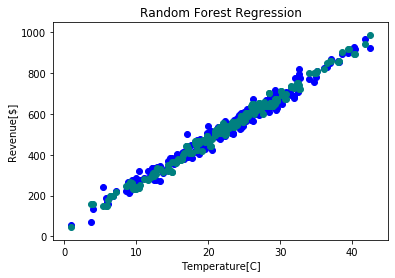

In [25]:
# Visualising the Random Forest Results
plt.scatter(X_test, y_test, color = 'blue')
plt.scatter(X_test, y_prediction_results, color = 'teal')
plt.title('Random Forest Regression')
plt.xlabel('Temperature[C]')
plt.ylabel('Revenue[$]')
plt.show()

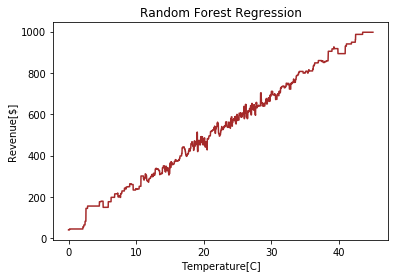

In [26]:
# Visualising the Random Forest Regression Results
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid, regressor.predict(X_grid), color = 'brown')
plt.title('Random Forest Regression')
plt.xlabel('Temperature[C]')
plt.ylabel('Revenue[$]')
plt.show()

In [27]:
# Predicting revenue at a given temperature
Temperature = 20
Revenue = regressor.predict([[Temperature]])
Revenue

array([477.5215334])

Keras Regression
----------------------------

In [28]:
# Import libraries
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [29]:
# Assigning X and y values
X_train = final_data['Temperature']
y_train = final_data['Revenue']

In [30]:
# Create a sequential model
model = Sequential()
model.add(Dense(units = 1, input_shape = [1]))

In [31]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Complile the model
model.compile(optimizer=Adam(0.1), loss = 'mean_squared_error')

In [33]:
# Train the model for 800 epochs
epochs = model.fit(X_train, y_train, epochs = 800)

Epoch 1/800
16/16 [==============================] - 0s 620us/step - loss: 245872.3125
Epoch 2/800
16/16 [==============================] - 0s 623us/step - loss: 208997.1719
Epoch 3/800
16/16 [==============================] - 0s 997us/step - loss: 176159.2656
Epoch 4/800
16/16 [==============================] - 0s 997us/step - loss: 147153.8125
Epoch 5/800
16/16 [==============================] - 0s 1ms/step - loss: 121931.3594
Epoch 6/800
16/16 [==============================] - 0s 873us/step - loss: 100321.4141
Epoch 7/800
16/16 [==============================] - 0s 997us/step - loss: 81850.3359
Epoch 8/800
16/16 [==============================] - 0s 873us/step - loss: 66032.1172
Epoch 9/800
16/16 [==============================] - 0s 810us/step - loss: 53105.1562
Epoch 10/800
16/16 [==============================] - 0s 810us/step - loss: 42231.3164
Epoch 11/800
16/16 [==============================] - 0s 748us/step - loss: 33223.4883
Epoch 12/800
16/16 [============================

16/16 [==============================] - 0s 561us/step - loss: 675.8568
Epoch 98/800
16/16 [==============================] - 0s 686us/step - loss: 675.2810
Epoch 99/800
16/16 [==============================] - 0s 623us/step - loss: 675.0893
Epoch 100/800
16/16 [==============================] - 0s 561us/step - loss: 674.9339
Epoch 101/800
16/16 [==============================] - 0s 810us/step - loss: 674.6871
Epoch 102/800
16/16 [==============================] - 0s 686us/step - loss: 674.3370
Epoch 103/800
16/16 [==============================] - 0s 748us/step - loss: 674.0024
Epoch 104/800
16/16 [==============================] - 0s 748us/step - loss: 673.9565
Epoch 105/800
16/16 [==============================] - 0s 686us/step - loss: 673.7228
Epoch 106/800
16/16 [==============================] - 0s 748us/step - loss: 673.5285
Epoch 107/800
16/16 [==============================] - 0s 623us/step - loss: 673.0910
Epoch 108/800
16/16 [==============================] - 0s 686us/step -

16/16 [==============================] - 0s 686us/step - loss: 629.7257
Epoch 286/800
16/16 [==============================] - 0s 810us/step - loss: 629.1743
Epoch 287/800
16/16 [==============================] - 0s 748us/step - loss: 628.7370
Epoch 288/800
16/16 [==============================] - 0s 810us/step - loss: 628.8630
Epoch 289/800
16/16 [==============================] - 0s 748us/step - loss: 629.3461
Epoch 290/800
16/16 [==============================] - ETA: 0s - loss: 635.611 - 0s 810us/step - loss: 628.6109
Epoch 291/800
16/16 [==============================] - 0s 873us/step - loss: 628.4272
Epoch 292/800
16/16 [==============================] - 0s 810us/step - loss: 630.5926
Epoch 293/800
16/16 [==============================] - 0s 873us/step - loss: 628.8342
Epoch 294/800
16/16 [==============================] - 0s 623us/step - loss: 630.6752
Epoch 295/800
16/16 [==============================] - 0s 873us/step - loss: 628.9561
Epoch 296/800
16/16 [=====================

16/16 [==============================] - 0s 1ms/step - loss: 626.5114
Epoch 476/800
16/16 [==============================] - 0s 1ms/step - loss: 624.6848
Epoch 477/800
16/16 [==============================] - 0s 686us/step - loss: 626.9123
Epoch 478/800
16/16 [==============================] - 0s 561us/step - loss: 626.4617
Epoch 479/800
16/16 [==============================] - 0s 748us/step - loss: 629.8980
Epoch 480/800
16/16 [==============================] - 0s 561us/step - loss: 626.5227
Epoch 481/800
16/16 [==============================] - 0s 810us/step - loss: 630.4583
Epoch 482/800
16/16 [==============================] - 0s 561us/step - loss: 626.0533
Epoch 483/800
16/16 [==============================] - 0s 686us/step - loss: 629.2493
Epoch 484/800
16/16 [==============================] - 0s 623us/step - loss: 624.6631
Epoch 485/800
16/16 [==============================] - 0s 810us/step - loss: 623.8688
Epoch 486/800
16/16 [==============================] - 0s 561us/step - l

16/16 [==============================] - 0s 686us/step - loss: 624.6752
Epoch 666/800
16/16 [==============================] - 0s 748us/step - loss: 626.8016
Epoch 667/800
16/16 [==============================] - 0s 748us/step - loss: 625.8413
Epoch 668/800
16/16 [==============================] - 0s 748us/step - loss: 627.1190
Epoch 669/800
16/16 [==============================] - 0s 810us/step - loss: 625.7086
Epoch 670/800
16/16 [==============================] - 0s 810us/step - loss: 624.4002
Epoch 671/800
16/16 [==============================] - 0s 748us/step - loss: 630.4849
Epoch 672/800
16/16 [==============================] - 0s 810us/step - loss: 635.6652
Epoch 673/800
16/16 [==============================] - 0s 748us/step - loss: 625.5369
Epoch 674/800
16/16 [==============================] - 0s 561us/step - loss: 625.7336
Epoch 675/800
16/16 [==============================] - 0s 686us/step - loss: 630.5446
Epoch 676/800
16/16 [==============================] - 0s 686us/step

In [34]:
# Record the training accuracy in the history object
epochs.history.keys()

dict_keys(['loss'])

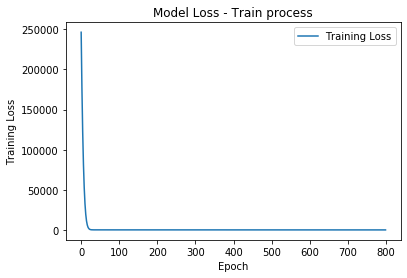

In [35]:
# Evaluate the model
plt.plot(epochs.history['loss'])
plt.title('Model Loss - Train process')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [36]:
# Get the weights right from the model - returns a numpy list of weights
model.get_weights()

[array([[21.4827]], dtype=float32), array([44.87925], dtype=float32)]

Text(0.5, 1.0, 'Revenue vs Temperature')

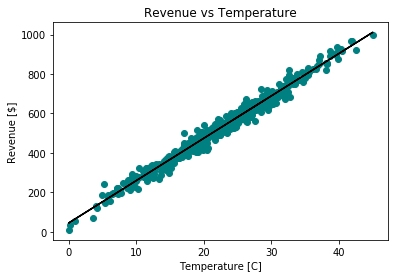

In [37]:
# Making Predictions with trained data
plt.scatter(X_train, y_train, color = 'teal')
plt.plot(X_train, model.predict(X_train), color = 'black')
plt.ylabel('Revenue [$]')
plt.xlabel('Temperature [C]')
plt.title('Revenue vs Temperature')

In [38]:
# Predicting revenue at a given temperature
Temperature = 20
Revenue = model.predict([Temperature])
print('Revenue Prediction using Trained Data =', Revenue)

Revenue Prediction using Trained Data = [[474.53323]]


Conclusions
--------------------

1. Models - Neural Network (Keras) Regression provides predictive model with greater accuracy.

----------------------------------------------------------------------------------------------------------------------

2. Revenue and Temperature: 
As per our graphs, Revenue and Temperature are very strongly positive correlated.

----------------------------------------------------------------------------------------------------------------------

3. Temperature and Consumption: 

(a)Summer months [June - August] -  Highest Consumption

(b)Winter months [December - February] - Lowest Consumption

----------------------------------------------------------------------------------------------------------------------

4. Next Steps

-Business Considerations

-Follow up studies

----------------------------------------------------------------------------------------------------------------------

5. Limitations and Further Investigation

-Month VS Revenue

-First five years VS Middle five years VS Last five years